## TASK 1 : BREAST CANCER CLASSIFICATION

### Algorithm: K-Nearest Neighbors (KNN), Random Forest Classifier, Linear Regression, Decision Tree Classifier, Logistic Regression
### Description: Classify breast cancer tumors as malignant or benign using features extracted from mammograms.

#### Importing necessary libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# K-Nearest Neighbors (KNN)

#### Step 1: Read the data

In [26]:
data = pd.read_csv("C:/Users/HP/Downloads/breast_cancer_data.csv")

#### Shape of the data

In [27]:
data.shape

(569, 32)

#### Summary

In [28]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [34]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

#### Step 2: Data analysis and preprocessing

In [35]:
print("Data Analysis:")

Data Analysis:


In [36]:
print(data.head())  # View the first few rows of data

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [37]:
print(data.info())  # Get data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

#### Check for missing values

In [38]:
print("Missing Values:")
print(data.isnull().sum())

Missing Values:
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


#### Visualize class distribution

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


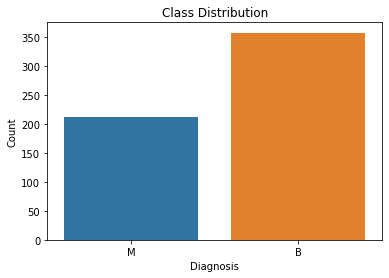

In [39]:
sns.countplot(data['diagnosis'])
plt.title('Class Distribution')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

#### Step 3: Preprocessing

#### Drop unnecessary columns like 'id'

In [40]:
data.drop('id', axis=1, inplace=True)

#### Convert diagnosis to binary: malignant=1, benign=0

In [41]:
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

#### Step 4: Feature selection

In [42]:
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

#### Step 5: Splitting data into train and test sets

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Step 6: Model Training and Evaluation

#### K-Nearest Neighbors (KNN)

In [44]:
# Create KNN model
knn_model = KNeighborsClassifier()

# Train the model
print("Training K-Nearest Neighbors (KNN)...")
knn_model.fit(X_train, y_train)

# Predictions
knn_predictions = knn_model.predict(X_test)

# Evaluation
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("KNN Accuracy:", knn_accuracy)
print("Classification Report for KNN:")
print(classification_report(y_test, knn_predictions))
print("Confusion Matrix for KNN:")
print(confusion_matrix(y_test, knn_predictions))

Training K-Nearest Neighbors (KNN)...
KNN Accuracy: 0.956140350877193
Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        71
           1       1.00      0.88      0.94        43

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion Matrix for KNN:
[[71  0]
 [ 5 38]]


#### Random Forest Classifier

In [45]:
# Create Random Forest model
rf_model = RandomForestClassifier()

# Train the model
print("\nTraining Random Forest Classifier...")
rf_model.fit(X_train, y_train)

# Predictions
rf_predictions = rf_model.predict(X_test)

# Evaluation
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)
print("Classification Report for Random Forest:")
print(classification_report(y_test, rf_predictions))
print("Confusion Matrix for Random Forest:")
print(confusion_matrix(y_test, rf_predictions))


Training Random Forest Classifier...
Random Forest Accuracy: 0.956140350877193
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion Matrix for Random Forest:
[[69  2]
 [ 3 40]]


#### Logistic Regression

In [46]:
# Create Logistic Regression model
logistic_model = LogisticRegression()

# Train the model
print("\nTraining Logistic Regression...")
logistic_model.fit(X_train, y_train)

# Predictions
logistic_predictions = logistic_model.predict(X_test)

# Evaluation
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
print("Logistic Regression Accuracy:", logistic_accuracy)
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, logistic_predictions))
print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix(y_test, logistic_predictions))


Training Logistic Regression...
Logistic Regression Accuracy: 0.9649122807017544
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Confusion Matrix for Logistic Regression:
[[70  1]
 [ 3 40]]


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Decision Tree Classifier

In [47]:
# Create Decision Tree model
dt_model = DecisionTreeClassifier()

# Train the model
print("\nTraining Decision Tree Classifier...")
dt_model.fit(X_train, y_train)

# Predictions
dt_predictions = dt_model.predict(X_test)

# Evaluation
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)
print("Classification Report for Decision Tree:")
print(classification_report(y_test, dt_predictions))
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test, dt_predictions))


Training Decision Tree Classifier...
Decision Tree Accuracy: 0.9298245614035088
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        71
           1       0.91      0.91      0.91        43

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114

Confusion Matrix for Decision Tree:
[[67  4]
 [ 4 39]]


#### Step 7: Visualization of Results

#### Visualizing Confusion Matrix for each model

In [48]:
plt.figure(figsize=(15, 10))

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

#### KNN

Text(33.0, 0.5, 'True Label')

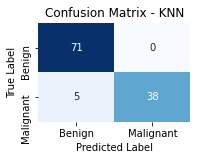

In [49]:
plt.subplot(2, 2, 1)
sns.heatmap(confusion_matrix(y_test, knn_predictions), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

#### Random Forest

Text(215.61818181818177, 0.5, 'True Label')

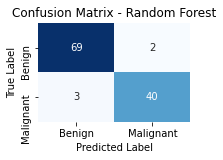

In [50]:
plt.subplot(2, 2, 2)
sns.heatmap(confusion_matrix(y_test, rf_predictions), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

#### Logistic Regression

Text(33.0, 0.5, 'True Label')

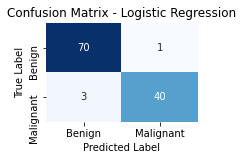

In [51]:
plt.subplot(2, 2, 3)
sns.heatmap(confusion_matrix(y_test, logistic_predictions), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

#### Decision Tree

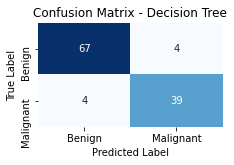

In [55]:
plt.subplot(2, 2, 4)
sns.heatmap(confusion_matrix(y_test, dt_predictions), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()